In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./cards'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Я нашел ограничитель так как у мен резко начал перегреваться комп от обучения модели,хотя я и все почистил и поменял термопасту я на всякий случай решил ограничить обучение

In [23]:
import tensorflow as tf

# Определяем процент использования ресурсов
limit = 0.7

# Ограничиваем использование памяти GPU
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=int(gpu.memory_limit * limit))]
            )
    except RuntimeError as e:
        print(e)


In [24]:
file_path_test ="./cards.csv"
data = pd.read_csv(file_path_test, encoding='cp1251', )

In [3]:
data.head()

,class index,filepaths,labels,card type,data set
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train


In [55]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце class index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Уникальные значения в столбце filepaths: ['train/ace of clubs/001.jpg' 'train/ace of clubs/002.jpg'
 'train/ace of clubs/003.jpg' ... 'valid/two of spades/3.jpg'
 'valid/two of spades/4.jpg' 'valid/two of spades/5.jpg']
Уникальные значения в столбце labels: ['ace of clubs' 'ace of diamonds' 'ace of hearts' 'ace of spades'
 'eight of clubs' 'eight of diamonds' 'eight of hearts' 'eight of spades'
 'five of clubs' 'five of diamonds' 'five of hearts' 'five of spades'
 'four of clubs' 'four of diamonds' 'four of hearts' 'four of spades'
 'jack of clubs' 'jack of diamonds' 'jack of hearts' 'jack of spades'
 'joker' 'king of clubs' 'king of diamonds' 'king of hearts'
 'king of spades' 'nine of clubs' 'nine of diamonds' 'nine of hearts'
 'nine of spades' 'queen of clubs' 'queen of diamonds' 

In [25]:
# Находим индексы строк, где значение в столбце 'data set' равно 'train'
train_indices = np.where(data['data set'] == 'train')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'test'
test_indices = np.where(data['data set'] == 'test')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'valid'
valid_indices = np.where(data['data set'] == 'valid')[0]

# Используем найденные индексы для разделения датасета
train = data.iloc[train_indices]
test = data.iloc[test_indices]
valid = data.iloc[valid_indices]

In [7]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")
print("--------------------------------------------------------------------")
for column in test.columns:
    unique_values = test[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")
print("--------------------------------------------------------------------")
for column in valid.columns:
    unique_values = valid[column].unique()
    print(f"Уникальные значения в столбце {column}: {unique_values}")

Уникальные значения в столбце class index: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Уникальные значения в столбце filepaths: ['train/ace of clubs/001.jpg' 'train/ace of clubs/002.jpg'
 'train/ace of clubs/003.jpg' ... 'train/two of spades/153.jpg'
 'train/two of spades/154.jpg' 'train/two of spades/155.jpg']
Уникальные значения в столбце labels: ['ace of clubs' 'ace of diamonds' 'ace of hearts' 'ace of spades'
 'eight of clubs' 'eight of diamonds' 'eight of hearts' 'eight of spades'
 'five of clubs' 'five of diamonds' 'five of hearts' 'five of spades'
 'four of clubs' 'four of diamonds' 'four of hearts' 'four of spades'
 'jack of clubs' 'jack of diamonds' 'jack of hearts' 'jack of spades'
 'joker' 'king of clubs' 'king of diamonds' 'king of hearts'
 'king of spades' 'nine of clubs' 'nine of diamonds' 'nine of hearts'
 'nine of spades' 'queen of clubs' 'queen of diam

In [24]:
import cv2

# Загрузка изображения
image = cv2.imread('./cards/train/ace of clubs/001.jpg')

# Получение размерности изображения
image_shape = image.shape[:2]  # Получаем только ширину и высоту

print("Размерность изображения:", image_shape)

Размерность изображения: (224, 224)


In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_folder = "./cards"

In [14]:
datagen = ImageDataGenerator(rescale=1./255)

In [17]:
# Чтение изображений из папки с использованием путей из датасета
image_data_generator = datagen.flow_from_dataframe(
    dataframe=train,
    directory=image_folder,
    x_col='filepaths',  # Название столбца с путями к изображениям
    y_col='card type',       # Название столбца с метками
    target_size=(224, 224),  # Размер изображений
    batch_size=32,
    class_mode='categorical'  # Режим классификации
)

# Создание модели нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.applications.MobileNetV2(include_top=False, input_shape=(224, 224, 3)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(14, activation='softmax')  # Пример: 10 классов для классификации
])

# Компиляция модели
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model.fit(image_data_generator, epochs=10)"""

Found 7624 validated image filenames belonging to 14 classes.


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/10


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


239/239 ━━━━━━━━━━━━━━━━━━━━ 438s 2s/step - accuracy: 0.5559 - loss: 1.3787
Epoch 2/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 419s 2s/step - accuracy: 0.8952 - loss: 0.3292
Epoch 3/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9380 - loss: 0.1956
Epoch 4/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.9459 - loss: 0.1825
Epoch 5/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 418s 2s/step - accuracy: 0.9544 - loss: 0.1390
Epoch 6/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 428s 2s/step - accuracy: 0.9637 - loss: 0.1182
Epoch 7/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.9626 - loss: 0.1240
Epoch 8/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 427s 2s/step - accuracy: 0.9742 - loss: 0.0826
Epoch 9/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.9690 - loss: 0.0960
Epoch 10/10
239/239 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.9763 - loss: 0.0751


In [19]:
model.save("model_V2.h5")

ValueError: Unable to synchronously create dataset (name already exists)

In [20]:
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=image_folder,
    x_col='filepaths',
    y_col='card type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Важно отключить перемешивание, чтобы сохранить соответствие между метками и предсказаниями
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid,
    directory=image_folder,
    x_col='filepaths',
    y_col='card type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Важно отключить перемешивание, чтобы сохранить соответствие между метками и предсказаниями
)

# Оценка модели на тестовом наборе данных
test_metrics = model.evaluate(test_generator)

# Оценка модели на валидационном наборе данных
valid_metrics = model.evaluate(valid_generator)

print("Метрики на тестовом наборе данных:", test_metrics)
print("Метрики на валидационном наборе данных:", valid_metrics)

Found 265 validated image filenames belonging to 14 classes.
Found 265 validated image filenames belonging to 14 classes.


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 335ms/step - accuracy: 0.5699 - loss: 3.0564
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 328ms/step - accuracy: 0.5581 - loss: 2.9119
Метрики на тестовом наборе данных: [3.1472280025482178, 0.5245283246040344]
Метрики на валидационном наборе данных: [3.112689256668091, 0.5132075548171997]


------------------------------------------------------------V-3--------------------------------------------------------------------------------

In [56]:
import cv2
import pandas as pd
import numpy as np

# Загрузка данных из CSV файла
data = pd.read_csv('./cards.csv')

# Предварительная обработка данных
images = []

for index, row in data.iterrows():
    # Загрузка изображения из файла
    image_path = row['filepaths']
    image = cv2.imread(image_path)
    
    # Масштабирование изображения до нужных размеров, если необходимо
    # image = cv2.resize(image, (desired_width, desired_height))
    
    # Преобразование изображения в матрицу
    image_matrix = np.array(image)
    
    # Добавление матрицы изображения в список
    images.append(image_matrix)

# Добавление нового столбца 'image' в датафрейм с матрицами изображений
data['image'] = images



In [57]:
data.head()

,class index,filepaths,labels,card type,data set,image
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,"[[[246, 248, 248], [249, 251, 251], [247, 249,..."
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ..."
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,"[[[255, 255, 252], [255, 255, 252], [252, 252,..."
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,"[[[253, 255, 254], [250, 255, 253], [246, 254,..."


In [4]:
# Находим индексы строк, где значение в столбце 'data set' равно 'train'
train_indices = np.where(data['data set'] == 'train')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'test'
test_indices = np.where(data['data set'] == 'test')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'valid'
valid_indices = np.where(data['data set'] == 'valid')[0]

# Используем найденные индексы для разделения датасета
train = data.iloc[train_indices]
test = data.iloc[test_indices]
valid = data.iloc[valid_indices]

In [60]:
train.head()

,class index,filepaths,labels,card type,data set,image
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,"[[[246, 248, 248], [249, 251, 251], [247, 249,..."
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ..."
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,"[[[255, 255, 252], [255, 255, 252], [252, 252,..."
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,"[[[253, 255, 254], [250, 255, 253], [246, 254,..."


In [20]:
train["image"].info

<bound method Series.info of 0       [[[255, 255, 255], [255, 255, 255], [255, 255,...
1       [[[246, 248, 248], [249, 251, 251], [247, 249,...
2       [[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ...
3       [[[255, 255, 252], [255, 255, 252], [252, 252,...
4       [[[253, 255, 254], [250, 255, 253], [246, 254,...
                              ...                        
7620    [[[181, 183, 184], [183, 185, 186], [190, 192,...
7621    [[[255, 255, 255], [255, 255, 255], [254, 254,...
7622    [[[229, 229, 229], [235, 235, 235], [239, 239,...
7623    [[[238, 238, 238], [239, 239, 239], [241, 241,...
7624    [[[111, 109, 108], [138, 136, 135], [187, 185,...
Name: image, Length: 7625, dtype: object>

In [19]:
none_values = data[data['image'].isnull()]
print(none_values)

Empty DataFrame
Columns: [class index, filepaths, labels, card type, data set, image]
Index: []


IndexError: iloc cannot enlarge its target object

In [44]:
import numpy as np

# Создаем пустой список для хранения всех вариантов размерностей изображений
размерности_изображений = []

# Проходимся по каждому изображению в датасете и добавляем его размерность в список
for image in data['image']:
    if isinstance(image, np.ndarray):
        размерность = image.shape
        if размерность not in размерности_изображений:
            размерности_изображений.append(размерность)

# Выводим все варианты размерностей изображений
print("Все варианты размерностей изображений:")
for размерность in размерности_изображений:
    print(размерность)

Все варианты размерностей изображений:
(224, 224, 3)
()


In [45]:
# Создаем счетчик для подсчета пустых размерностей
количество_пустых_изображений = 0

# Проходимся по каждому изображению в датасете и проверяем его размерность
for image in data['image']:
    if isinstance(image, np.ndarray):
        if image.ndim == 0:  # Проверяем, имеет ли изображение пустую размерность
            количество_пустых_изображений += 1

# Выводим количество изображений с пустой размерностью
print("Количество изображений с пустой размерностью:", количество_пустых_изображений)

Количество изображений с пустой размерностью: 1


In [61]:
data_V34 = data[data['image'].apply(lambda x: isinstance(x, np.ndarray) and x.ndim != 0)]

# Выводим информацию о новом датасете
print("Новый размер датасета после удаления изображений с пустой размерностью:", data_V34.shape)

Новый размер датасета после удаления изображений с пустой размерностью: (8154, 6)


In [65]:
data_V34['image'] = data_V34['image'].apply(lambda x: x / 255.0 if isinstance(x, np.ndarray) else x)

MemoryError: Unable to allocate 1.15 MiB for an array with shape (224, 224, 3) and data type float64

In [62]:
data_V34.head()

,class index,filepaths,labels,card type,data set,image
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,"[[[246, 248, 248], [249, 251, 251], [247, 249,..."
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,"[[[0, 0, 0], [1, 1, 1], [1, 1, 1], [0, 0, 0], ..."
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,"[[[255, 255, 252], [255, 255, 252], [252, 252,..."
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,"[[[253, 255, 254], [250, 255, 253], [246, 254,..."


In [49]:
data.head()

,class index,filepaths,labels,card type,data set,image
0,0,train/ace of clubs/001.jpg,ace of clubs,ace,train,"[[[6.030862941101084e-08, 6.030862941101084e-0..."
1,0,train/ace of clubs/002.jpg,ace of clubs,ace,train,"[[[5.8180089549445756e-08, 5.865309840757133e-..."
2,0,train/ace of clubs/003.jpg,ace of clubs,ace,train,"[[[0.0, 0.0, 0.0], [2.365044290627876e-10, 2.3..."
3,0,train/ace of clubs/004.jpg,ace of clubs,ace,train,"[[[6.030862941101084e-08, 6.030862941101084e-0..."
4,0,train/ace of clubs/005.jpg,ace of clubs,ace,train,"[[[5.983562055288528e-08, 6.030862941101084e-0..."


нормализовал данные

In [27]:
from sklearn.preprocessing import LabelEncoder
# Находим индексы строк, где значение в столбце 'data set' равно 'train'
train_indices = np.where(data['data set'] == 'train')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'test'
test_indices = np.where(data['data set'] == 'test')[0]

# Находим индексы строк, где значение в столбце 'data set' равно 'valid'
valid_indices = np.where(data['data set'] == 'valid')[0]

# Используем найденные индексы для разделения датасета
train = data.iloc[train_indices]
test = data.iloc[test_indices]
valid = data.iloc[valid_indices]



# Создание объекта LabelEncoder
label_encoder = LabelEncoder()
# Преобразование текстовых меток в числовой формат
true_labels = label_encoder.fit_transform(test['card type'])

In [40]:
уникальные_значения = data["card type"].unique()
print(уникальные_значения)

['ace' 'eight' 'five' 'four' 'jack' 'xxx' 'king' 'nine' 'queen' 'seven'
 'six' 'ten' 'three' 'two']


У нас будет 14 классов 

In [5]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report

# Создание модели
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224)),  # Предполагается, что изображения уже нормализованы
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(14)  # 14 классов "card type"
])

# Компиляция модели
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучение модели
model.fit(train, epochs=10, validation_data=valid)

# Оценка модели
test_loss, test_acc = model.evaluate(test)
print('Точность на тестовых данных:', test_acc)

# Получение прогнозов модели
predictions = model.predict(test)
predicted_labels = tf.argmax(predictions, axis=1)

# Вычисление confusion matrix и classification report
true_labels = ...  # Истинные метки из тестовых данных
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

До этого момента у мен был план вручную создать матрицы изобржений а потом их нормализовать,спустя 9 часов попыток оказалось что оперативной памяти у меня не хватает

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
# Создание генераторов данных для тренировочного, тестового и валидационного наборов
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Загрузка данных с использованием генераторов
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    x_col='filepaths',  # Путь к изображениям
    y_col='card type',  # Метки классов
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
      workers=2  # Для SparseCategoricalCrossentropy
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    x_col='filepaths',
    y_col='card type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    workers=2
)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe=valid,
    x_col='filepaths',
    y_col='card type',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    workers=2
)

# Создание и компиляция модели
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),  # Применение Dropout
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Применение Dropout
    tf.keras.layers.Dense(60, activation='relu'),
    tf.keras.layers.Dense(14 , activation='softmax')
])

model.compile(optimizer='RMSprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучение модели с использованием генераторов данных
history = model.fit(train_generator,
                    epochs=15,
                    validation_data=valid_generator)

# Оценка модели
test_loss, test_acc = model.evaluate(test_generator)
print('Точность на тестовых данных:', test_acc)

# Получение прогнозов модели
predictions = model.predict(test_generator)
predicted_labels = tf.argmax(predictions, axis=1)

# Вычисление confusion matrix и classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)

print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)


Found 7624 validated image filenames belonging to 14 classes.
Found 265 validated image filenames belonging to 14 classes.
Found 265 validated image filenames belonging to 14 classes.
Epoch 1/15


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\legacy\preprocessing\image.py:920: UserWarning: Found 1 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(
c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(
c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\dat

239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 394ms/step - accuracy: 0.2986 - loss: 4.3009 - val_accuracy: 0.7094 - val_loss: 0.9097
Epoch 2/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 95s 396ms/step - accuracy: 0.6667 - loss: 1.1163 - val_accuracy: 0.8415 - val_loss: 0.5955
Epoch 3/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 91s 381ms/step - accuracy: 0.8087 - loss: 0.6521 - val_accuracy: 0.8755 - val_loss: 0.4947
Epoch 4/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 85s 356ms/step - accuracy: 0.9017 - loss: 0.3422 - val_accuracy: 0.8868 - val_loss: 0.4409
Epoch 5/15
239/239 ━━━━━━━━━━━━━━━━━━━━ 87s 362ms/step - accuracy: 0.9477 - loss: 0.1772 - val_accuracy: 0.8906 - val_loss: 0.5644
Epoch 6/15
189/239 ━━━━━━━━━━━━━━━━━━━━ 17s 356ms/step - accuracy: 0.9685 - loss: 0.1022

KeyboardInterrupt: 

In [14]:
true_labels = test['card type'].values

In [33]:
model.save("model_V7.h5")

In [31]:
from sklearn.metrics import confusion_matrix, classification_report
from numpy import sqrt, mean

# Затем вы можете использовать функцию mean для вычисления среднего значения
RMSE = sqrt(mean((true_labels - predictions.argmax(axis=1)) ** 2))

# Вычисление confusion matrix и classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels)


print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)
print('rmse:\n', RMSE)

Confusion Matrix:
 [[2 2 1 2 1 0 2 3 2 1 2 1 1 0]
 [2 3 1 2 1 2 0 2 0 0 3 1 2 1]
 [4 1 2 0 0 2 3 1 0 2 2 3 0 0]
 [4 2 0 2 0 4 0 1 2 1 0 0 3 1]
 [1 3 1 1 1 3 1 3 2 0 2 0 2 0]
 [3 1 1 2 2 2 1 1 2 1 2 2 0 0]
 [0 1 0 0 2 2 2 1 1 3 2 4 2 0]
 [0 2 2 1 0 2 4 0 2 2 1 1 1 2]
 [3 2 3 0 3 2 5 1 1 0 0 0 0 0]
 [0 1 1 3 1 0 0 4 1 5 2 1 0 1]
 [4 2 1 3 1 2 0 0 3 1 0 3 0 0]
 [2 1 0 1 2 2 1 1 2 2 3 2 1 0]
 [2 1 2 2 3 2 1 1 1 1 1 1 2 0]
 [0 2 1 0 0 0 0 0 0 0 1 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.07      0.10      0.09        20
           1       0.12      0.15      0.14        20
           2       0.12      0.10      0.11        20
           3       0.11      0.10      0.10        20
           4       0.06      0.05      0.05        20
           5       0.08      0.10      0.09        20
           6       0.10      0.10      0.10        20
           7       0.00      0.00      0.00        20
           8       0.05      0.05  

In [32]:
# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Полнота (Recall) вычисляется как TP / (TP + FN)
TP = conf_matrix[1, 1]  # Количество истинно положительных предсказаний
FN = conf_matrix[1, 0]  # Количество ложно отрицательных предсказаний
recall = TP / (TP + FN)

# F1-мера (F1-Score) вычисляется как гармоническое среднее между точностью и полнотой
precision = TP / (TP + conf_matrix[0, 1])  # Точность (Precision) = TP / (TP + FP)
f1_score = 2 * (precision * recall) / (precision + recall)

# Вывод результатов
print("Полнота (Recall):", recall)
print("F1-мера (F1-Score):", f1_score)

Полнота (Recall): 0.6
F1-мера (F1-Score): 0.6


---------------------------------------------------------V - 3 -----------------------------------------------------------------------

Я взял одно из решений этой задачи в интернете и адаптировал его на манер моей прошлой попытки но использовал на этот раз больше кассов карт а также методы того как они присваивались и читались сами картинки

In [1]:
import pathlib

In [2]:
train_dir = "./train"
train_dataset_dir = pathlib.Path(train_dir)

val_dir = "./valid"
val_dataset_dir = pathlib.Path(val_dir)

test_dir = "./test"
test_dataset_dir = pathlib.Path(test_dir)

In [3]:
Image_Size = 112
Batch_Size = 96
Channels = 3
Epochs = 20

In [8]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    val_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dataset_dir, batch_size = Batch_Size, image_size = (Image_Size, Image_Size), shuffle = True)

Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


In [22]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 112, 112, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [9]:
class_names = train_dataset.class_names

In [10]:
train_ds = train_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_dataset.cache().shuffle(100).prefetch(buffer_size = tf.data.AUTOTUNE)

In [12]:
from tensorflow.keras import models, layers

# Задайте размер изображения
Image_Size = 224

# Создайте последовательную модель
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(Image_Size, Image_Size),
    layers.Rescaling(1.0/255)
])

In [13]:
from functools import partial
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same", activation="relu", kernel_initializer="he_normal")

In [14]:


import tensorflow as tf

# Определяем процент использования ресурсов
limit = 0.7

# Ограничиваем использование памяти GPU
gpus = tf.config.list_physical_devices('СPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            tf.config.experimental.set_virtual_device_configuration(
                gpu,
                [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=int(gpu.memory_limit * limit))]
            )
    except RuntimeError as e:
        print(e)


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report
# Создание генераторов данных для тренировочного, тестового и валидационного наборов







    # Создание и компиляция модели
model = tf.keras.Sequential([
        resize_and_rescale,
        DefaultConv2D(filters=32, kernel_size=7, input_shape=[Image_Size, Image_Size, 3]),
        DefaultConv2D(filters=32, kernel_size=7),
        tf.keras.layers.MaxPool2D(),
        DefaultConv2D(filters=64, kernel_size=5),
        DefaultConv2D(filters=64, kernel_size=5),
        tf.keras.layers.MaxPool2D(),
        DefaultConv2D(filters=128),
        DefaultConv2D(filters=128),
        tf.keras.layers.MaxPool2D(),
        DefaultConv2D(filters=256),
        DefaultConv2D(filters=256),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=128, activation="relu", kernel_initializer="he_normal"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units=53, activation="softmax")
    ])
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

input_shape = (Batch_Size, Image_Size, Image_Size, Channels)
model.build(input_shape=input_shape)
model.summary()

model.compile(optimizer='RMSprop',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])


history = model.fit(train_ds, epochs=Epochs, validation_data=val_ds, callbacks=[early_stopping])




c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ (96, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (96, 224, 224, 32)     │         4,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (96, 224, 224, 32)     │        50,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (96, 112, 112, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (96, 112, 112, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (96, 112, 112, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (96, 56, 56, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (96, 56, 56, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (96, 56, 56, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (96, 28, 28, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (96, 28, 28, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (96, 28, 28, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (96, 14, 14, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (96, 50176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (96, 50176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (96, 128)              │     6,422,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (96, 128)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (96, 53)               │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,744,853 (29.54 MB)

 Trainable params: 7,744,853 (29.54 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


c:\Users\anon\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


80/80 ━━━━━━━━━━━━━━━━━━━━ 677s 8s/step - accuracy: 0.0195 - loss: 6.2836 - val_accuracy: 0.0189 - val_loss: 3.9705
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 590s 7s/step - accuracy: 0.0244 - loss: 3.9729 - val_accuracy: 0.0377 - val_loss: 3.9601
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 593s 7s/step - accuracy: 0.0612 - loss: 3.8168 - val_accuracy: 0.2679 - val_loss: 2.7769
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 593s 7s/step - accuracy: 0.2078 - loss: 3.1105 - val_accuracy: 0.4453 - val_loss: 1.9822
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 592s 7s/step - accuracy: 0.3596 - loss: 2.4597 - val_accuracy: 0.6642 - val_loss: 1.5073
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 592s 7s/step - accuracy: 0.4852 - loss: 1.9522 - val_accuracy: 0.6906 - val_loss: 1.1237
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 591s 7s/step - accuracy: 0.5759 - loss: 1.5860 - val_accuracy: 0.7547 - val_loss: 0.9459
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 591s 7s/step - accuracy: 0.6219 - loss: 1.3897 - val_accuracy: 0.7774 - val_loss: 0.

In [16]:
model.save("model_V8.h5")

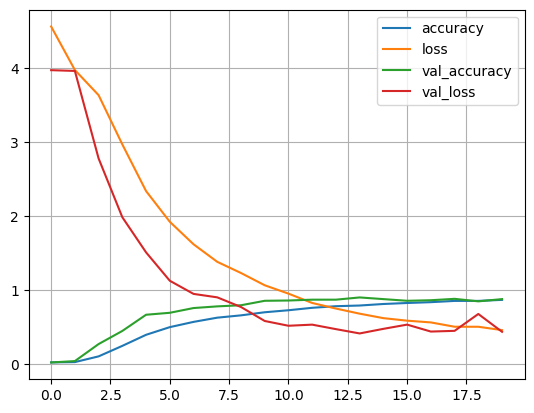

In [18]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(grid=True)
plt.show()

In [20]:
predictions = model.predict(test_ds)
predicted_labels = tf.argmax(predictions, axis=1)




3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step


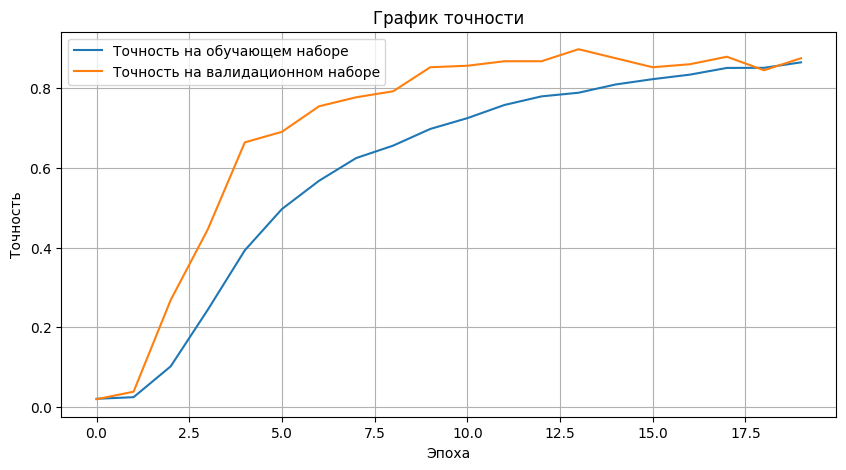

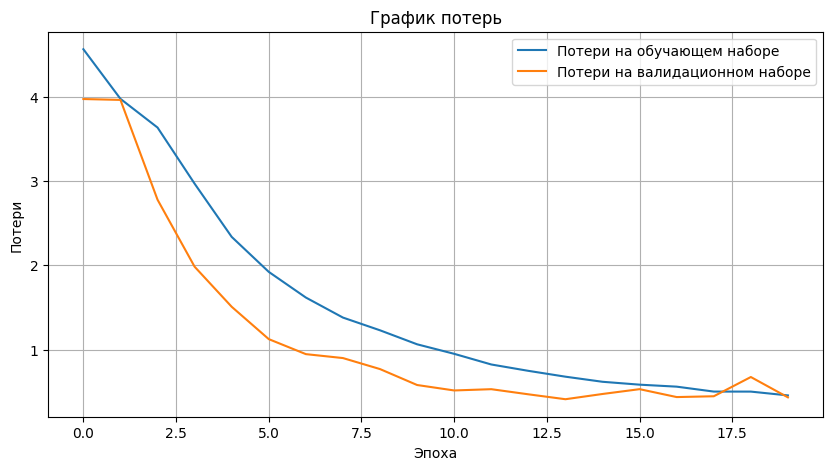

In [35]:
import matplotlib.pyplot as plt

# Получение значений метрик из объекта history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Построение графика точности
plt.figure(figsize=(10, 5))
plt.plot(accuracy, label='Точность на обучающем наборе')
plt.plot(val_accuracy, label='Точность на валидационном наборе')
plt.xlabel('Эпоха')
plt.ylabel('Точность')
plt.title('График точности')
plt.legend()
plt.grid(True)
plt.show()

# Построение графика потерь
plt.figure(figsize=(10, 5))
plt.plot(loss, label='Потери на обучающем наборе')
plt.plot(val_loss, label='Потери на валидационном наборе')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.title('График потерь')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
test_loss, test_accuracy = model.evaluate(test_ds)

# Вывод результатов оценки
print('Точность на тестовом наборе данных:', test_accuracy)
print('Потери на тестовом наборе данных:', test_loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8728 - loss: 0.4201
Точность на тестовом наборе данных: 0.8679245114326477
Потери на тестовом наборе данных: 0.4722207486629486


In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# Получение предсказаний модели на тестовом наборе данных
predictions = model.predict(test_ds)
predicted_labels = tf.argmax(predictions, axis=1)

# Получение истинных меток из тестового набора данных
true_labels = []
for images, labels in test_ds:
    true_labels.extend(labels.numpy())

# Вычисление матрицы ошибок
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print('Матрица ошибок:\n', conf_matrix)


3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step
Матрица ошибок:
 [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 1 0 ... 1 1 0]
 [0 0 1 ... 0 1 0]
 [0 0 0 ... 0 0 0]]
